<a href="https://colab.research.google.com/github/sizeof-malloc/Proyecto-Spear-Phishing/blob/main/Spear%20Phishing%20Detection%20NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seccion 2

<p>Esta sección describe la carga de un conjunto de datos</p>

Tamaño del conjunto de datos $\mathbb{R}^{11928 \times 2}$

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/sizeof-malloc/Proyecto-Spear-Phishing/main/fraud_email_.csv"
df = pd.read_csv(url)
df = df.dropna() 
y = df['Class'].values
X = df['Text']

In [ ]:
df.head(12)

,Text,Class
0,Supply Quality China's EXCLUSIVE dimensions at...,1
1,over. SidLet me know. Thx.,0
2,"Dear Friend,Greetings to you.I wish to accost ...",1
3,MR. CHEUNG PUIHANG SENG BANK LTD.DES VOEUX RD....,1
4,Not a surprising assessment from Embassy.,0
5,Monica -Huma Abedin <Huma@clintonemail.com>Tue...,0
6,Pis print.H <hrod17@clintonemail.com>Thursday ...,0
7,Dear Tom--H <hrod17@clintonemail.com>Friday De...,0
8,Greetings from barrister Robert Williams=2CDea...,1
9,FYI. Thanks again for signing the book ---- an...,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y)

Instalacion y configuracion del entorno.

In [ ]:
%pip install tensorflow-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 40.9 MB/s eta 0:00:00


<p>En esta sección se muestra el pre-procesamiento</p>

In [ ]:
import tensorflow_text as text
import tensorflow as tf
import tensorflow_hub as hub
bert_preprocesar = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_codificador = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
def get_oracion_embebida(oracion):
    texto_preprocesado= bert_preprocesar(oracion)
    return bert_codificador(texto_preprocesado)['pooled_output']

get_oracion_embebida([X_train.values[0],X_train.values[1]])

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.48321354, -0.36696044, -0.9171686 , ..., -0.8857244 ,
        -0.58254665,  0.45809036],
       [-0.88665015, -0.30721253, -0.12627852, ...,  0.04625957,
        -0.6892686 ,  0.9242595 ]], dtype=float32)>

In [ ]:
# Capas de Bert
entrada_texto = tf.keras.layers.Input(shape=(), dtype=tf.string, name='texto')
texto_preprocesado = bert_preprocesar(entrada_texto)
salidas = bert_codificador(texto_preprocesado)

# Capas de la red neuronal
l = tf.keras.layers.Dropout(0.1, name="dropout")(salidas['pooled_output'])
l = tf.keras.layers.Dense(32, activation='relu', name="oculta_1")(l)
l = tf.keras.layers.Dense(1, activation='sigmoid', name="salidas")(l)

# Utilizar entradas y salidas para construir el modelo
model = tf.keras.Model(inputs=[entrada_texto], outputs = [l])


In [ ]:
salidas

{'sequence_output': <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'keras_layer_1')>,
 'default': <KerasTensor: shape=(None, 768) dtype=float32 (created by layer 'keras_layer_1')>,
 'encoder_outputs': [<KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'keras_layer_1')>,
  <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'keras_layer_1')>,
  <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'keras_layer_1')>,
  <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'keras_layer_1')>,
  <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'keras_layer_1')>,
  <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'keras_layer_1')>,
  <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'keras_layer_1')>,
  <KerasTensor: shape=(None, 128, 768) dtype=float32 (created by layer 'keras_layer_1')>,
  <KerasTensor: shape=(None, 128, 768) dtype=float32 (crea

In [ ]:
model = tf.keras.Model(inputs=[entrada_texto], outputs=[l])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])



In [ ]:
import numpy as np

history = model.fit(X_train, np.array(y_train), epochs=32, batch_size = 512, 
                    validation_data=(X_test, np.array(y_test)))

Epoch 1/32
18/18 [==============================] - 269s 15s/step - loss: 0.5950 - accuracy: 0.6854 - recall: 0.5887 - precision: 0.6535 - val_loss: 0.4307 - val_accuracy: 0.8270 - val_recall: 0.8395 - val_precision: 0.7794
Epoch 2/32
18/18 [==============================] - 257s 14s/step - loss: 0.4145 - accuracy: 0.8189 - recall: 0.7925 - precision: 0.7913 - val_loss: 0.3594 - val_accuracy: 0.8585 - val_recall: 0.8580 - val_precision: 0.8237
Epoch 3/32
18/18 [==============================] - 256s 14s/step - loss: 0.3592 - accuracy: 0.8512 - recall: 0.8560 - precision: 0.8120 - val_loss: 0.3144 - val_accuracy: 0.8830 - val_recall: 0.9028 - val_precision: 0.8399
Epoch 4/32
18/18 [==============================] - 256s 14s/step - loss: 0.3150 - accuracy: 0.8735 - recall: 0.8728 - precision: 0.8420 - val_loss: 0.2797 - val_accuracy: 0.8947 - val_recall: 0.9282 - val_precision: 0.8448
Epoch 5/32
18/18 [==============================] - 256s 14s/step - loss: 0.2814 - accuracy: 0.8890 - re

In [ ]:
loss, accuracy, recall, precision = model.evaluate(X_test, y_test)
print('Loss: ', loss)
print('Accuracy: ', accuracy)
print('Recall: ', recall)
print('Precision: ', precision)

94/94 [==============================] - 32s 345ms/step - loss: 0.0688 - accuracy: 0.9762 - recall: 0.9830 - precision: 0.9630
Loss:  0.06880643218755722
Accuracy:  0.976190447807312
Recall:  0.9830247163772583
Precision:  0.9629629850387573


In [ ]:
y_pred = model.predict(X_test)

94/94 [==============================] - 32s 335ms/step


In [ ]:
y_pred

array([[1.4572535e-04],
       [9.9873036e-01],
       [5.0527705e-03],
       ...,
       [3.0826040e-02],
       [7.7725434e-01],
       [9.9131572e-01]], dtype=float32)

In [ ]:
import numpy as np

In [ ]:
y_pred_class = np.round(y_pred)


In [ ]:
y_pred_class[100:150]

array([[0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [ ]:
y_pred_class.size

2982

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred_class)
print("Precisión: ", accuracy)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_class)
print("Matriz de confusión:\n", conf_matrix)

Precisión:  0.9761904761904762
Matriz de confusión:
 [[1637   49]
 [  22 1274]]


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Definir el callback
checkpoint_path = "model_checkpoint.h5"
checkpoint_callback = ModelCheckpoint(
    checkpoint_path,
    monitor="val_accuracy",  # monitorear la precisión en el conjunto de validación
    save_best_only=True,  # guardar solo el mejor modelo según la métrica monitoreada
    save_weights_only=False,  # guardar el modelo completo (no solo los pesos)
    verbose=1,
)

# Entrenar el modelo con el callback
history = model.fit(
    X_train,
    y_train,
    epochs=24,
    batch_size=512,
    validation_data=(X_test, y_test),
    callbacks=[checkpoint_callback],
)

# Cargar el mejor modelo guardado según la métrica monitoreada
model.load_weights(checkpoint_path)


Epoch 1/24
18/18 [==============================] - ETA: 0s - loss: 0.0935 - accuracy: 0.9678 - recall: 0.9607 - precision: 0.9651 
Epoch 1: val_accuracy improved from -inf to 0.97954, saving model to model_checkpoint.h5
18/18 [==============================] - 259s 15s/step - loss: 0.0935 - accuracy: 0.9678 - recall: 0.9607 - precision: 0.9651 - val_loss: 0.0607 - val_accuracy: 0.9795 - val_recall: 0.9761 - val_precision: 0.9768
Epoch 2/24
18/18 [==============================] - ETA: 0s - loss: 0.0861 - accuracy: 0.9712 - recall: 0.9632 - precision: 0.9702 
Epoch 2: val_accuracy improved from 0.97954 to 0.98290, saving model to model_checkpoint.h5
18/18 [==============================] - 257s 14s/step - loss: 0.0861 - accuracy: 0.9712 - recall: 0.9632 - precision: 0.9702 - val_loss: 0.0600 - val_accuracy: 0.9829 - val_recall: 0.9707 - val_precision: 0.9898
Epoch 3/24
18/18 [==============================] - ETA: 0s - loss: 0.0903 - accuracy: 0.9689 - recall: 0.9607 - precision: 0.967

#Seccion 3

In [ ]:
%pip install tensorflow-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 52.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [ ]:
url = "https://raw.githubusercontent.com/sizeof-malloc/Proyecto-Spear-Phishing/main/fraud_email_.csv"
df = pd.read_csv(url)
df = df.dropna()
y = df['Class'].values
X = df['Text']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [ ]:
bert_preprocesar = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_codificador = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
l = tf.keras.layers.Dropout(0.1, name="dropout")(salidas['pooled_output'])
l = tf.keras.layers.Dense(32, activation='relu', name="oculta_1")(l)
l = tf.keras.layers.Dense(1, activation='sigmoid', name="salidas")(l)
model = tf.keras.Model(inputs=[entrada_texto], outputs=[l])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])


In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

In [ ]:
history = model.fit(X_train, np.array(y_train), epochs=20, batch_size=32,
                    validation_data=(X_test, np.array(y_test)),
                    callbacks=[early_stopping, checkpoint])

Epoch 1/20
299/299 [==============================] - 693s 2s/step - loss: 0.5532 - accuracy: 0.7627 - recall: 0.6544 - precision: 0.7659 - val_loss: 0.4806 - val_accuracy: 0.8181 - val_recall: 0.7792 - val_precision: 0.7976
Epoch 2/20
299/299 [==============================] - 665s 2s/step - loss: 0.4590 - accuracy: 0.8107 - recall: 0.7674 - precision: 0.7911 - val_loss: 0.4338 - val_accuracy: 0.8252 - val_recall: 0.7956 - val_precision: 0.8010
Epoch 3/20
299/299 [==============================] - 662s 2s/step - loss: 0.4237 - accuracy: 0.8246 - recall: 0.8077 - precision: 0.7928 - val_loss: 0.4072 - val_accuracy: 0.8420 - val_recall: 0.8370 - val_precision: 0.8067
Epoch 4/20
299/299 [==============================] - 656s 2s/step - loss: 0.4004 - accuracy: 0.8351 - recall: 0.8224 - precision: 0.8032 - val_loss: 0.3897 - val_accuracy: 0.8445 - val_recall: 0.8380 - val_precision: 0.8106
Epoch 5/20
299/299 [==============================] - 656s 2s/step - loss: 0.3810 - accuracy: 0.8427

In [ ]:
model = tf.keras.models.load_model('best_model.h5', custom_objects={'KerasLayer': hub.KerasLayer})

In [ ]:
y_pred = model.predict(X_test)
y_pred_class = np.round(y_pred).flatten()

75/75 [==============================] - 133s 2s/step


In [ ]:
accuracy = accuracy_score(y_test, y_pred_class)
recall = tf.keras.metrics.Recall()(y_test, y_pred_class)
precision = tf.keras.metrics.Precision()(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)

In [ ]:
print("Accuracy: ", accuracy)
print("Recall: ", recall.numpy())
print("Precision: ", precision.numpy())
print("F1-score: ", f1)

Accuracy:  0.9090528080469404
Recall:  0.9026037
Precision:  0.88973385
F1-score:  0.8961225466730492


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_class)
print("Confusion Matrix:\n", conf_matrix)

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
def plot_history(history):
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))

    axes[0, 0].plot(history.history['accuracy'], label='Train Accuracy')
    axes[0, 0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[0, 0].set_title('Accuracy')
    axes[0, 0].legend()

    axes[0, 1].plot(history.history['recall'], label='Train Recall')
    axes[0, 1].plot(history.history['val_recall'], label='Validation Recall')
    axes[0, 1].set_title('Recall')
    axes[0, 1].legend()

    axes[1, 0].plot(history.history['precision'], label='Train Precision')
    axes[1, 0].plot(history.history['val_precision'], label='Validation Precision')
    axes[1, 0].set_title('Precision')
    axes[1, 0].legend()

    axes[1, 1].plot(history.history['loss'], label='Train Loss')
    axes[1, 1].plot(history.history['val_loss'], label='Validation Loss')
    axes[1, 1].set_title('Loss')
    axes[1, 1].legend()

    plt.tight_layout()
    plt.show()


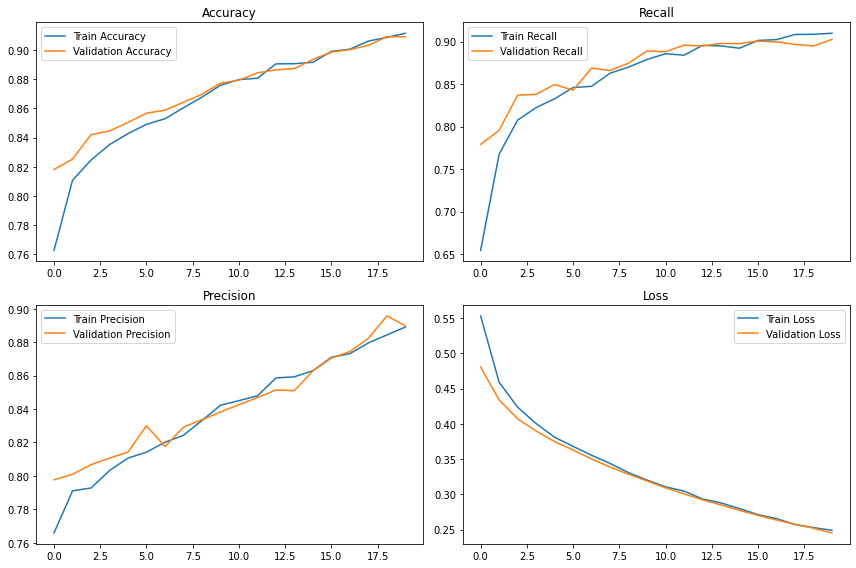

In [ ]:
plot_history(history)
